In [1]:
import numpy as np
import scipy
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import time
import imageio
import os
from copy import deepcopy
import numpy.ma as ma

In [2]:
%run ../methodsMemoryDeposition

In [3]:
%run ../main.py

Stopped at time: 100.00287579825985| N_Ptcls: 36419| N_snapshots: 101


In [4]:
params = {
    "height":               400,
    "dom":                  400,
    "ndim":                   1,
    "t_max":                100,
    "r_0":                    1,
    "tau":                  0.5,
    "dt_snapshot":            1,          
    "n_ptcl_snapshot":    np.inf,
    "foldername":  "SimResults",
    "filename":        "result",
    }

In [5]:
mean_exit_times = []
std_exit_times = []
taus = []

for i in np.arange(-1, 0, 0.01):
    tau = (10**i)
    params["tau"] = tau
    taus.append(tau)

    local_exit_time = []
    for _ in range(10):
        
        _, times = main(params)
        if len(times) > 1:
            local_exit_time.append(times[-1])
        else:
            local_exit_time.append(0)

    mean_exit_times.append(np.mean(local_exit_time)) 
    std_exit_times.append(np.std(local_exit_time))

EVERYONE IS DEAD AT: 0.5356329776031248 | N_Ptcls: 49| N_snapshots: 1
EVERYONE IS DEAD AT: 0.47321308377097826 | N_Ptcls: 45| N_snapshots: 1
EVERYONE IS DEAD AT: 0.5192818294972126 | N_Ptcls: 35| N_snapshots: 1
EVERYONE IS DEAD AT: 0.5563401209386689 | N_Ptcls: 50| N_snapshots: 1
EVERYONE IS DEAD AT: 0.6542921473748783 | N_Ptcls: 50| N_snapshots: 1
EVERYONE IS DEAD AT: 0.8280004720102322 | N_Ptcls: 43| N_snapshots: 1
EVERYONE IS DEAD AT: 0.4025324959851958 | N_Ptcls: 42| N_snapshots: 1
EVERYONE IS DEAD AT: 0.7726739724454069 | N_Ptcls: 62| N_snapshots: 1
EVERYONE IS DEAD AT: 0.29727825994531093 | N_Ptcls: 50| N_snapshots: 1
EVERYONE IS DEAD AT: 0.735698691199064 | N_Ptcls: 41| N_snapshots: 1
EVERYONE IS DEAD AT: 0.6500980734121573 | N_Ptcls: 52| N_snapshots: 1
EVERYONE IS DEAD AT: 0.5116181158665728 | N_Ptcls: 53| N_snapshots: 1
EVERYONE IS DEAD AT: 0.6573935991986805 | N_Ptcls: 61| N_snapshots: 1
EVERYONE IS DEAD AT: 0.33563901962578724 | N_Ptcls: 28| N_snapshots: 1
EVERYONE IS DEAD A

In [9]:
y_low = np.array(mean_exit_times) - np.array(std_exit_times)
y_high = np.array(mean_exit_times) + np.array(std_exit_times)

Text(0.5, 1.0, 'Survival time for $r_0 = 1$')

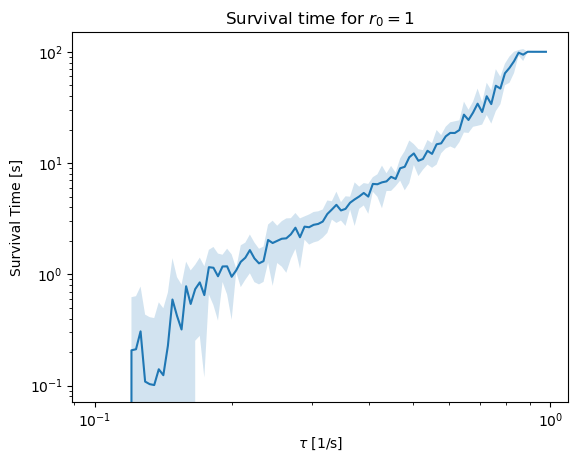

In [24]:
plt.plot(taus, mean_exit_times, label='Data')
plt.fill_between(taus, y_low, y_high, alpha=0.2, label='Error Area')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\tau$ [1/s]")
plt.ylabel("Survival Time [s]")
plt.title("Survival time for $r_0 = 1$")